In [1]:
# Importing libraries for data visualization
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

#Import the necessary libraries
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [1]:

# Reading the csv file into a data frame
instagram_data <- read.csv("insta_data.csv")



# Finding the number of null values in each column
colSums(is.na(instagram_data))

# Dropping rows with null values
instagram_data <- na.omit(instagram_data)


Impressions      From.Home  From.Hashtags   From.Explore     From.Other 
             0              0              0              0              0 
         Saves       Comments         Shares          Likes Profile.Visits 
             0              0              0              0              0 
       Follows        Caption       Hashtags 
             0              0              0

Installing tidytext [0.4.1] ...
	OK [linked cache]



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer

Joining with `by = join_by(word)`


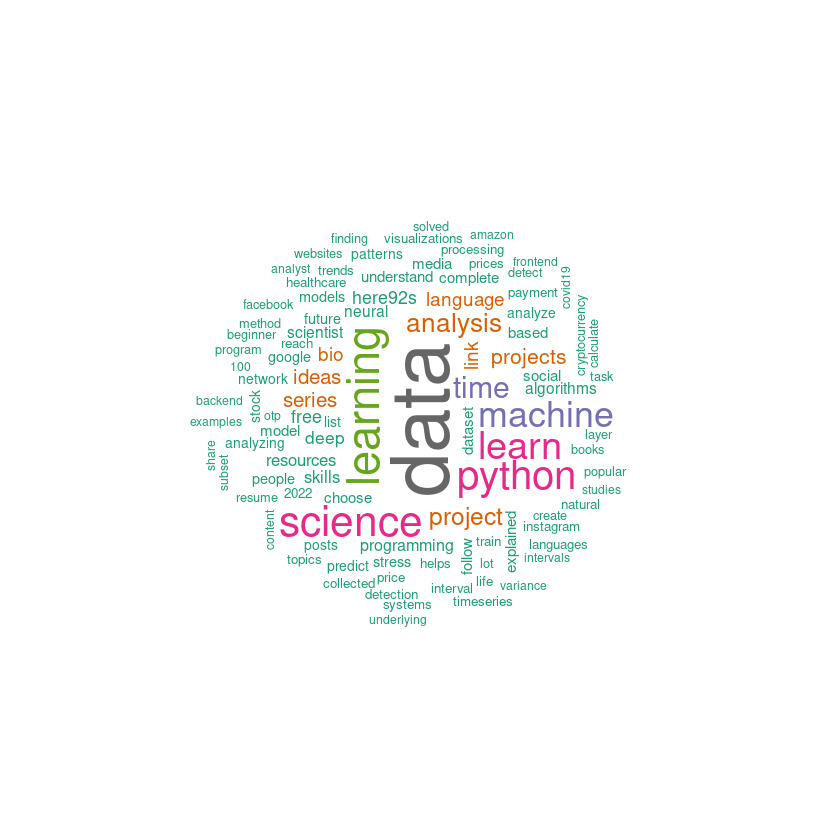

In [2]:

# Install and load the necessary libraries
install.packages("tidytext")
library(tidytext)
library(dplyr)
library(wordcloud)

# Create a dataframe with just the captions
captions <- instagram_data %>% select(Caption)

# Remove punctuation and convert to lowercase
captions <- captions %>% mutate(Caption = tolower(gsub("[[:punct:]]", "", Caption)))

# Split the captions into individual words
words <- captions %>% unnest_tokens(word, Caption)

# Remove stop words
words <- words %>% anti_join(stop_words)

# Create a frequency table of the words
word_freq <- words %>% count(word, sort = TRUE)

# Create a wordcloud of the top 100 words
wordcloud(words = word_freq$word, freq = word_freq$n, max.words = 100, random.order = FALSE, colors = brewer.pal(8, "Dark2"))